In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_mse

5.2078260004364685

In [9]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_mse

4.114050771972589

In [16]:
alpha = [0.1, 1, 1.0]
lasso_error = []
ridge_error = []
for a in alpha:
    lasso = Lasso(alpha=a)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    lasso_mse = mean_squared_error(y_test, y_pred)
    lasso_error.append(lasso_mse)

    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    ridge_mse = mean_squared_error(y_test, y_pred)
    ridge_error.append(ridge_mse)
    

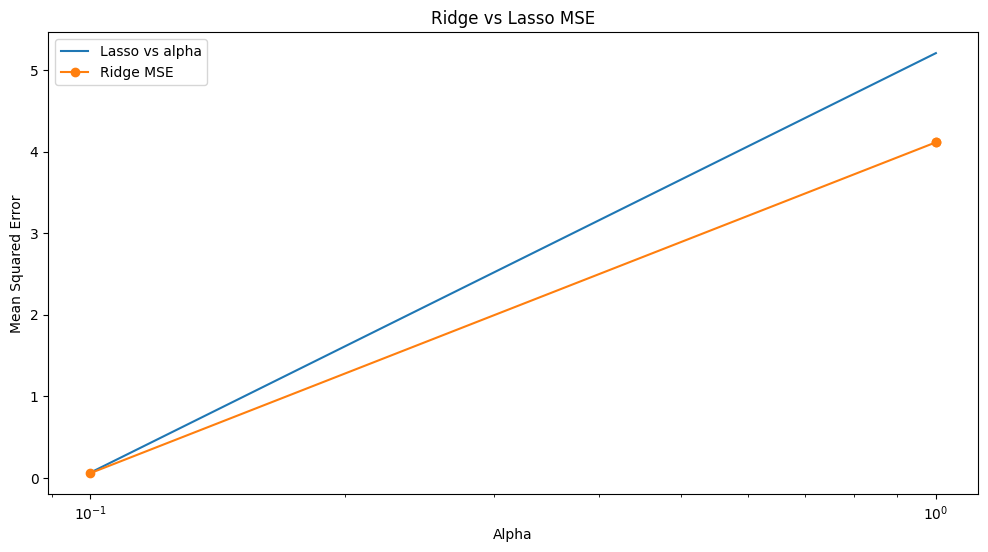

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(alpha, lasso_error, label="Lasso vs alpha")
plt.plot(alpha, ridge_error, label='Ridge MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge vs Lasso MSE')
plt.legend()
plt.show()